In [50]:
from openaq import OpenAQ
import pandas as pd
import time
import matplotlib.pyplot as plt
import geopandas as gpd
import tqdm
import folium
from opencage.geocoder import OpenCageGeocode
from collections import defaultdict

In [2]:
client = OpenAQ(api_key = '')

In [3]:
def locations(client, limite=200):
    all_locations = []
    x_limit = 60

    for i in tqdm.tqdm(range(1, limite + 1)):
        try:
            if x_limit < 10:
                time.sleep(60)
            
            response = client.locations.list(page=i, limit=1000)
            x_limit = response.headers.x_ratelimit_remaining
            results = response.results

            for result in results:
                for sensor in result.sensors:
                    sensor_data = {
                        'location_id': result.id,
                        'location_name': result.name,
                        'locality': result.locality if result.locality else None,
                        'timezone': result.timezone,
                        'country': result.country.name,
                        'owner': result.owner.name,
                        'provider': result.provider.name,
                        'is_mobile': result.is_mobile,
                        'is_monitor': result.is_monitor,
                        'latitude': result.coordinates.latitude,
                        'longitude': result.coordinates.longitude,
                        'datetime_first_utc': result.datetime_first.utc if result.datetime_first else None,
                        'datetime_last_utc': result.datetime_last.utc if result.datetime_last else None,
                        'datetime_first_local': result.datetime_first.local if result.datetime_first else None,
                        'datetime_last_local': result.datetime_last.local if result.datetime_last else None,
                        'sensor_id': sensor.id if sensor.id else None,
                        'sensor_name': sensor.name if sensor.name else None,
                        'sensor_parameter': sensor.parameter.name if sensor.parameter else None,
                        'parameter_id': sensor.parameter.id if sensor.parameter else None,
                        'parameter_units': sensor.parameter.units if sensor.parameter else None
                    }
                    all_locations.append(sensor_data)

        except Exception as e:
            print(f"Error en la página {i}: {e}")
            break  

    return pd.DataFrame(all_locations)


In [ ]:
locations_df = locations(client= client, limite= 200)

In [ ]:
#locations_df.to_csv('./output/locations.csv', index= False)

In [51]:
locations_df = pd.read_csv('./output/locations.csv')

In [52]:
locations_df.groupby('sensor_parameter').count()

,location_id,location_name,locality,timezone,country,owner,provider,is_mobile,is_monitor,latitude,longitude,datetime_first_utc,datetime_last_utc,datetime_first_local,datetime_last_local,sensor_id,sensor_name,parameter_id,parameter_units
sensor_parameter,,,,,,,,,,,,,,,,,,,
bc,234,234,117,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234
co,6222,6220,3200,6222,6222,6222,6222,6222,6222,6222,6222,6175,6175,6175,6175,6222,6222,6222,6222
co2,38,38,2,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
humidity,75,71,0,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
no,4340,4340,3982,4340,4340,4340,4340,4340,4340,4340,4340,4297,4297,4297,4297,4340,4340,4340,4340
no2,11865,11863,7978,11865,11865,11865,11865,11865,11865,11865,11865,11783,11783,11783,11783,11865,11865,11865,11865
nox,2210,2210,2074,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210
o3,9605,9605,6092,9605,9605,9605,9605,9605,9605,9605,9605,9559,9559,9559,9559,9605,9605,9605,9605
pm1,1940,1914,9,1940,1940,1940,1921,1940,1940,1940,1940,1896,1896,1896,1896,1940,1940,1940,1940


In [53]:
parameters = ['co', 'co2', 'so2', 'pm25', 'pm10', 'no2']

In [54]:
columnas = ['datetime_first_utc', 'datetime_first_local', 'datetime_last_utc', 'datetime_last_local']
for col in columnas:
    locations_df[col] = pd.to_datetime(locations_df[col])

C:\Users\HP\AppData\Local\Temp\ipykernel_59020\4091745950.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  locations_df[col] = pd.to_datetime(locations_df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_59020\4091745950.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  locations_df[col] = pd.to_datetime(locations_df[col])


In [19]:
interes = locations_df.loc[locations_df['datetime_first_utc'] <= pd.Timestamp('2021-03-23T00:00:00Z')]
#interes.to_csv('./output/sensores.csv', index = False)

In [56]:
key = '9fcde07edade4671aec5e2f6d020716a'
geocoder = OpenCageGeocode(key)

In [57]:
ports = [
    "Suez Canal", "Luanda, Angola", "Douala, Cameroon", "Pointe Noire, Congo",
    "Matadi, Democratic Republic of the Congo", "Djibouti, Djibouti",
    "Bata, Equatorial Guinea", "Assab, Eritrea", "Djibouti, Ethiopia",
    "Libreville, Gabon", "Mombasa, Kenya", "Toamasina, Madagascar",
    "Beira, Mozambique", "Walvis Bay, Namibia", "Nigeria, Nigeria",
    "Mogadishu, Somalia", "Durban, South Africa", "Port Sudan, Sudan",
    "Dar Es Salaam, Tanzania"
]

tratados = pd.DataFrame(columns=["Port", "Latitude", "Longitude"])
for port in ports:
    result = geocoder.geocode(port)
    if result:
        location = result[0]['geometry']
        row = {"Port": port, "Latitude": location['lat'], "Longitude": location['lng']}
        tratados = pd.concat([tratados, pd.DataFrame([row])], ignore_index= True)
        
tratados.to_csv('./input/puertos_tratados.csv', index= False)

C:\Users\HP\AppData\Local\Temp\ipykernel_59020\2938829747.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tratados = pd.concat([tratados, pd.DataFrame([row])], ignore_index= True)


In [58]:
tratados = pd.read_csv('./input/puertos_tratados.csv')

In [59]:
def plot_locations_on_world_map(df, title=None, size=0.5, ports_df=None, ports_color='blue', ports_size= 2):
    # Cargar el mapa del mundo
    world = gpd.read_file('./input/world_map/ne_110m_admin_0_countries.shp')

    # Crear una figura y un eje
    fig, ax = plt.subplots(figsize=(12, 8))

    # Dibujar el mapa del mundo
    world.plot(ax=ax, color='lightgray')

    # Graficar los puntos de las ubicaciones de los sensores
    ax.scatter(df['longitude'], df['latitude'], color='red', s=size, alpha=0.5, label='Sensors')

    # Graficar los puntos de los puertos si se proporciona un DataFrame de puertos
    if ports_df is not None:
        ax.scatter(ports_df['Longitude'], ports_df['Latitude'], color=ports_color, s=ports_size, alpha=0.7, label='Ports')

    # Ajustar límites del gráfico
    ax.set_xlim([-180, 180])
    ax.set_ylim([-90, 90])

    # Añadir leyenda
    ax.legend()

    # Títulos y etiquetas
    if title:
        ax.set_title(title, fontsize=15)

    # Mostrar el gráfico
    plt.show()


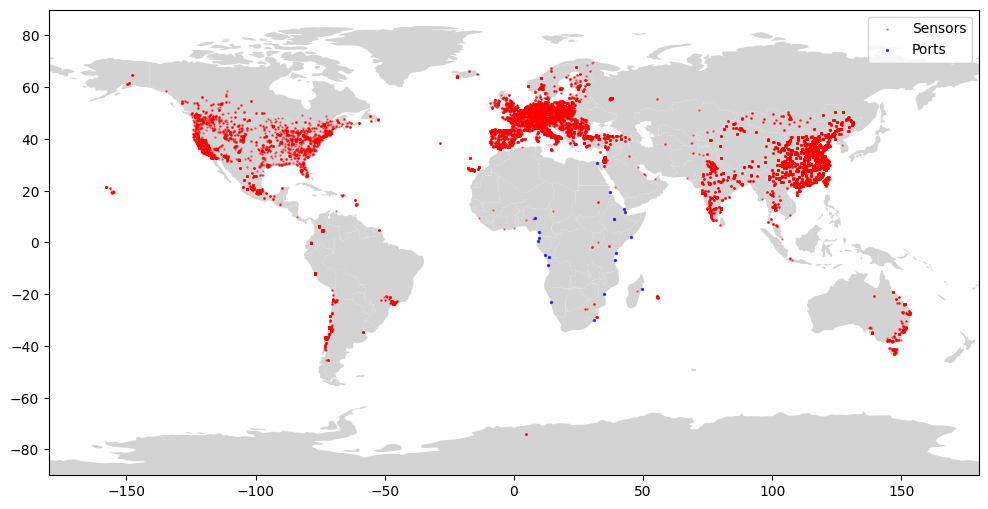

In [60]:
plot_locations_on_world_map(
    interes.loc[interes['sensor_parameter'].isin(parameters)],
    ports_df=tratados,
    ports_color='blue'
)

In [11]:
measures = client.measurements.list(40, datetime_from= '2021-03-01', datetime_to='2021-03-31')
results = measures.results
print(measures)

MeasurementsResponse(headers=Headers(x_ratelimit_limit=60, x_ratelimit_remaining=59, x_ratelimit_used=1, x_ratelimit_reset=60), meta=Meta(name='openaq-api', website='/', page=1, limit=1000, found=696), results=[Measurement(period=Period(label='raw', interval='01:00:00', datetime_from=Datetime(utc='2021-02-28T16:00:00Z', local='2021-03-01T00:00:00+08:00'), datetime_to=Datetime(utc='2021-02-28T17:00:00Z', local='2021-03-01T01:00:00+08:00')), value=23.0, parameter=ParameterBase(id=2, name='pm25', units='µg/m³', display_name=None), coordinates=None, summary=None, coverage=Coverage(expected_count=1, expected_interval='01:00:00', observed_count=1, observed_interval='01:00:00', percent_complete=100.0, percent_coverage=100.0, datetime_from=Datetime(utc='2021-02-28T16:00:00Z', local='2021-03-01T00:00:00+08:00'), datetime_to=Datetime(utc='2021-02-28T17:00:00Z', local='2021-03-01T01:00:00+08:00'))), Measurement(period=Period(label='raw', interval='01:00:00', datetime_from=Datetime(utc='2021-02-28

In [ ]:
def measures(ids):
    all_data = []
    x_lim = 60
    superan = []
    for id in tqdm.tqdm(ids):
        if x_lim < 2:
            time.sleep(60)
        try:
            measure = client.measurements.list(id, datetime_from= '2021-03-01', datetime_to='2021-03-31')
            x_lim = measure.headers.x_ratelimit_remaining
            found = measure.meta.found
            limit = measure.meta.limit
            results = measure.results
            for result in results:
                sensor_data={
					'sensor_id': id,
					'datetime_from': result.period.datetime_from.utc,
					'datetime_to': result.period.datetime_to.utc,
					'interval': result.period.interval,
					'value': result.value,
					'parameter': result.parameter.name,
				}
                all_data.append(sensor_data)
        except Exception as e:
            continue
    return pd.DataFrame(all_data)

In [14]:
ids = interes['sensor_id']
valores, superan = measures(ids)

  0%|          | 0/5121 [00:00<?, ?it/s]

  1%|▏         | 70/5121 [01:32<1:23:09,  1.01it/s]HTTP 500 - {"message":"Internal Server Error"}
NoneType: None
  8%|▊         | 387/5121 [09:15<2:17:28,  1.74s/it]HTTP 500 - {"message":"Internal Server Error"}
NoneType: None
 65%|██████▍   | 3317/5121 [1:21:27<49:41,  1.65s/it]   HTTP 500 - {"message":"Internal Server Error"}
NoneType: None
 70%|███████   | 3593/5121 [1:29:19<41:52,  1.64s/it]  HTTP 500 - {"message":"Internal Server Error"}
NoneType: None
 70%|███████   | 3605/5121 [1:29:57<51:19,  2.03s/it]  HTTP 500 - {"message":"Internal Server Error"}
NoneType: None
 88%|████████▊ | 4532/5121 [1:55:42<15:59,  1.63s/it]  HTTP 500 - {"message":"Internal Server Error"}
NoneType: None
 96%|█████████▌| 4926/5121 [2:05:47<05:06,  1.57s/it]  HTTP 500 - {"message":"Internal Server Error"}
NoneType: None
 96%|█████████▋| 4937/5121 [2:06:20<06:05,  1.99s/it]HTTP 500 - {"message":"Internal Server Error"}
NoneType: None
 98%|█████████▊| 5011/5121 [2:08:37<03:00,  1.64s/it]HTTP 500 - {"messag

In [4]:
valores.to_csv('./output/pm25_valores.csv', index = False)

In [18]:
client.close()

In [2]:
valores = pd.read_csv('./output/pm25_valores.csv')

In [3]:
valores['datetime_from'] = pd.to_datetime(valores['datetime_from'])
valores['datetime_to'] = pd.to_datetime(valores['datetime_to'])